In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt 

In [2]:
import sys 
sys.path.append('../') # add the parent directory to the path

### GENERATE MARKDOWN TEXT

In [3]:
from helper.generate_markdown import generate_markdown_text
generate_markdown_text('4.Display the count of Congressional members on a state-by-state basis.')

'4. [Display the count of Congressional members on a state-by-state basis.](#-4.Display-the-count-of-Congressional-members-on-a-state-by-state-basis.)'

# Explore Pandas GroupBy and Memory Optimization using US Congress Dataset
1. [Find columns composed of missing values only.](#-1.Find-columns-composed-of-missing-values-only.)
2. [Compare the memory usage of each object column.](#-2.Compare-the-memory-usage-of-each-object-column.)
3. [Create a new df and run dtype transformation.](#-3.Create-a-new-df-and-run-dtype-transformation.)
4. [Display the count of Congressional members on a state-by-state basis.](#-4.Display-the-count-of-Congressional-members-on-a-state-by-state-basis.)

In [4]:
df = pd.read_csv('../data/external/legislators-historical.csv')

df.shape

(11975, 34)

In [5]:
df.columns

Index(['last_name', 'first_name', 'middle_name', 'suffix', 'nickname',
       'full_name', 'birthday', 'gender', 'type', 'state', 'district',
       'senate_class', 'party', 'url', 'address', 'phone', 'contact_form',
       'rss_url', 'twitter', 'facebook', 'youtube', 'youtube_id',
       'bioguide_id', 'thomas_id', 'opensecrets_id', 'lis_id', 'fec_ids',
       'cspan_id', 'govtrack_id', 'votesmart_id', 'ballotpedia_id',
       'washington_post_id', 'icpsr_id', 'wikipedia_id'],
      dtype='object')

In [6]:
df.head()

,last_name,first_name,middle_name,suffix,nickname,full_name,birthday,gender,type,state,district,senate_class,party,url,address,phone,contact_form,rss_url,twitter,facebook,youtube,youtube_id,bioguide_id,thomas_id,opensecrets_id,lis_id,fec_ids,cspan_id,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id
0,Bassett,Richard,NaN,NaN,NaN,NaN,1745-04-02,M,sen,DE,NaN,2.0,Anti-Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B000226,NaN,NaN,NaN,NaN,NaN,401222,NaN,NaN,NaN,507.0,Richard Bassett (politician)
1,Bland,Theodorick,NaN,NaN,NaN,NaN,1742-03-21,M,rep,VA,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B000546,NaN,NaN,NaN,NaN,NaN,401521,NaN,NaN,NaN,786.0,Theodorick Bland (congressman)
2,Burke,Aedanus,NaN,NaN,NaN,NaN,1743-06-16,M,rep,SC,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B001086,NaN,NaN,NaN,NaN,NaN,402032,NaN,NaN,NaN,1260.0,Aedanus Burke
3,Carroll,Daniel,NaN,NaN,NaN,NaN,1730-07-22,M,rep,MD,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C000187,NaN,NaN,NaN,NaN,NaN,402334,NaN,NaN,NaN,1538.0,Daniel Carroll
4,Clymer,George,NaN,NaN,NaN,NaN,1739-03-16,M,rep,PA,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C000538,NaN,NaN,NaN,NaN,NaN,402671,NaN,NaN,NaN,1859.0,George Clymer


### 1.Find columns composed of missing values only.

In [7]:
df.isnull().all()

last_name             False
first_name            False
middle_name           False
suffix                False
nickname              False
full_name             False
birthday              False
gender                False
type                  False
state                 False
district              False
senate_class          False
party                 False
url                   False
address               False
phone                 False
contact_form          False
rss_url               False
twitter                True
facebook               True
youtube                True
youtube_id             True
bioguide_id           False
thomas_id             False
opensecrets_id        False
lis_id                False
fec_ids               False
cspan_id              False
govtrack_id           False
votesmart_id          False
ballotpedia_id        False
washington_post_id     True
icpsr_id              False
wikipedia_id          False
dtype: bool

In [8]:
# filter the null-only columns
df.columns[df.isnull().all()]

Index(['twitter', 'facebook', 'youtube', 'youtube_id', 'washington_post_id'], dtype='object')

In [9]:
# save the null only column as list
null_col_list = df.columns[df.isnull().all()].to_list()
null_col_list

['twitter', 'facebook', 'youtube', 'youtube_id', 'washington_post_id']

In [10]:
# method 1: pass in the null_col_list
df.drop(null_col_list, axis=1).columns

Index(['last_name', 'first_name', 'middle_name', 'suffix', 'nickname',
       'full_name', 'birthday', 'gender', 'type', 'state', 'district',
       'senate_class', 'party', 'url', 'address', 'phone', 'contact_form',
       'rss_url', 'bioguide_id', 'thomas_id', 'opensecrets_id', 'lis_id',
       'fec_ids', 'cspan_id', 'govtrack_id', 'votesmart_id', 'ballotpedia_id',
       'icpsr_id', 'wikipedia_id'],
      dtype='object')

In [11]:
# method 2: use dropna(how='all') method
df = df.dropna(how='all', axis=1)

In [12]:
df.shape

(11975, 29)

[BACK TO TOP][def]

[def]: #explore-pandas-groupby-and-memory-optimization-using-us-congress-dataset 

### 2.Compare the memory usage of each object column.

In [13]:
# calculate the dataframe memory usage
df_memory_usage = f"{round(df.memory_usage(index=False, deep=True).sum() / 1_048_576)} MB" # exclude Index

df_memory_usage

'12 MB'

In [14]:
# save the dataframe columns as python list
col_list = df.columns.to_list()

# check the first five elements
col_list[:5]

['last_name', 'first_name', 'middle_name', 'suffix', 'nickname']

In [15]:
# filter out the columns that are of object type
col_list = [col for col in df.columns.to_list() if df[col].dtype == 'object' ]
col_list

['last_name',
 'first_name',
 'middle_name',
 'suffix',
 'nickname',
 'full_name',
 'birthday',
 'gender',
 'type',
 'state',
 'party',
 'url',
 'address',
 'phone',
 'contact_form',
 'rss_url',
 'bioguide_id',
 'opensecrets_id',
 'lis_id',
 'fec_ids',
 'ballotpedia_id',
 'wikipedia_id']

- Another way of filtering out certain data types using `select_dtypes(include='DTYPE')` method.

In [16]:
df.select_dtypes(include='object').columns

Index(['last_name', 'first_name', 'middle_name', 'suffix', 'nickname',
       'full_name', 'birthday', 'gender', 'type', 'state', 'party', 'url',
       'address', 'phone', 'contact_form', 'rss_url', 'bioguide_id',
       'opensecrets_id', 'lis_id', 'fec_ids', 'ballotpedia_id',
       'wikipedia_id'],
      dtype='object')

In [17]:
memory_dict = dict()

for col in col_list:
    memory_dict[col] = df[col].memory_usage(deep=True, index=False)
    
memory_dict['TOTAL MEMORY USAGE'] = sum(memory_dict.values())

object_memory_usage = memory_dict['TOTAL MEMORY USAGE']

memory_dict

{'last_name': 762391,
 'first_name': 752837,
 'middle_name': 643952,
 'suffix': 395006,
 'nickname': 389830,
 'full_name': 396610,
 'birthday': 782970,
 'gender': 694550,
 'type': 718500,
 'state': 706525,
 'party': 781452,
 'url': 416118,
 'address': 408825,
 'phone': 395965,
 'contact_form': 398773,
 'rss_url': 396687,
 'bioguide_id': 766400,
 'opensecrets_id': 405810,
 'lis_id': 388739,
 'fec_ids': 401912,
 'ballotpedia_id': 390491,
 'wikipedia_id': 896606,
 'TOTAL MEMORY USAGE': 12290949}

In [18]:
memory_dict = dict()

for col in col_list:
    memory_dict[col] = df[col].astype('category').memory_usage(deep=True, index=False)

# add the total usage to the dictionary
memory_dict['TOTAL MEMORY USAGE'] = sum(memory_dict.values())

# save the total usage for comparison
category_memory_usage = memory_dict['TOTAL MEMORY USAGE']

memory_dict

{'last_name': 506547,
 'first_name': 154604,
 'middle_name': 275704,
 'suffix': 12445,
 'nickname': 23900,
 'full_name': 56568,
 'birthday': 993960,
 'gender': 12199,
 'type': 12203,
 'state': 17501,
 'party': 18262,
 'url': 94005,
 'address': 68288,
 'phone': 52187,
 'contact_form': 54277,
 'rss_url': 52117,
 'bioguide_id': 1054582,
 'opensecrets_id': 84392,
 'lis_id': 39769,
 'fec_ids': 76430,
 'ballotpedia_id': 41521,
 'wikipedia_id': 1184724,
 'TOTAL MEMORY USAGE': 4886185}

In [19]:
# difference in bytes 
print(f"Approximate memory savings: {round((object_memory_usage - category_memory_usage) / 1_048_576)} MB" )

Approximate memory savings: 7 MB


In [20]:
# import the helper module
from US_Congress import memory_usage_difference

output = memory_usage_difference(df)
output

{'column_diff': {'last_name': {'diff_bytes': 256775, 'diff_percent': '34%'},
  'first_name': {'diff_bytes': 598340, 'diff_percent': '79%'},
  'middle_name': {'diff_bytes': 368248, 'diff_percent': '57%'},
  'suffix': {'diff_bytes': 382561, 'diff_percent': '97%'},
  'nickname': {'diff_bytes': 365930, 'diff_percent': '94%'},
  'full_name': {'diff_bytes': 340042, 'diff_percent': '86%'},
  'birthday': {'diff_bytes': -210990, 'diff_percent': '-27%'},
  'gender': {'diff_bytes': 682351, 'diff_percent': '98%'},
  'type': {'diff_bytes': 706297, 'diff_percent': '98%'},
  'state': {'diff_bytes': 689024, 'diff_percent': '98%'},
  'district': {'diff_bytes': 368697, 'diff_percent': '96%'},
  'senate_class': {'diff_bytes': 371093, 'diff_percent': '97%'},
  'party': {'diff_bytes': 763190, 'diff_percent': '98%'},
  'url': {'diff_bytes': 322113, 'diff_percent': '77%'},
  'address': {'diff_bytes': 340537, 'diff_percent': '83%'},
  'phone': {'diff_bytes': 343778, 'diff_percent': '87%'},
  'contact_form': {

In [21]:
# pretify the output using pprint
import pprint

pp = pprint.PrettyPrinter(indent=4)

pp.pprint(output)

{   'column_diff': {   'address': {'diff_bytes': 340537, 'diff_percent': '83%'},
                       'ballotpedia_id': {   'diff_bytes': 348970,
                                             'diff_percent': '89%'},
                       'bioguide_id': {   'diff_bytes': -288182,
                                          'diff_percent': '-38%'},
                       'birthday': {   'diff_bytes': -210990,
                                       'diff_percent': '-27%'},
                       'contact_form': {   'diff_bytes': 344496,
                                           'diff_percent': '86%'},
                       'cspan_id': {   'diff_bytes': 339378,
                                       'diff_percent': '89%'},
                       'district': {   'diff_bytes': 368697,
                                       'diff_percent': '96%'},
                       'fec_ids': {'diff_bytes': 325482, 'diff_percent': '81%'},
                       'first_name': {   'diff_bytes': 598340,
 

- Image presentation of the column difference.

<!-- ![alt text](../assets/pprint.png) -->

<img src="../assets/pprint.png" alt="output image" width="50%"/>

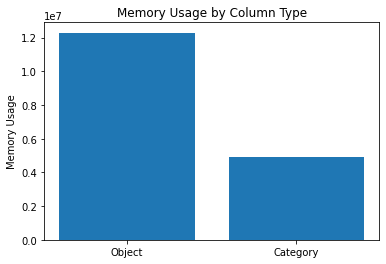

In [29]:
# plot memory usage
fig, ax = plt.subplots()
ax.bar(['Object', 'Category'], [object_memory_usage, category_memory_usage])
ax.set_ylabel('Memory Usage')
ax.set_title('Memory Usage by Column Type')
plt.show()

In [31]:
output

{'column_diff': {'last_name': {'diff_bytes': 256775, 'diff_percent': '34%'},
  'first_name': {'diff_bytes': 598340, 'diff_percent': '79%'},
  'middle_name': {'diff_bytes': 368248, 'diff_percent': '57%'},
  'suffix': {'diff_bytes': 382561, 'diff_percent': '97%'},
  'nickname': {'diff_bytes': 365930, 'diff_percent': '94%'},
  'full_name': {'diff_bytes': 340042, 'diff_percent': '86%'},
  'birthday': {'diff_bytes': -210990, 'diff_percent': '-27%'},
  'gender': {'diff_bytes': 682351, 'diff_percent': '98%'},
  'type': {'diff_bytes': 706297, 'diff_percent': '98%'},
  'state': {'diff_bytes': 689024, 'diff_percent': '98%'},
  'district': {'diff_bytes': 368697, 'diff_percent': '96%'},
  'senate_class': {'diff_bytes': 371093, 'diff_percent': '97%'},
  'party': {'diff_bytes': 763190, 'diff_percent': '98%'},
  'url': {'diff_bytes': 322113, 'diff_percent': '77%'},
  'address': {'diff_bytes': 340537, 'diff_percent': '83%'},
  'phone': {'diff_bytes': 343778, 'diff_percent': '87%'},
  'contact_form': {

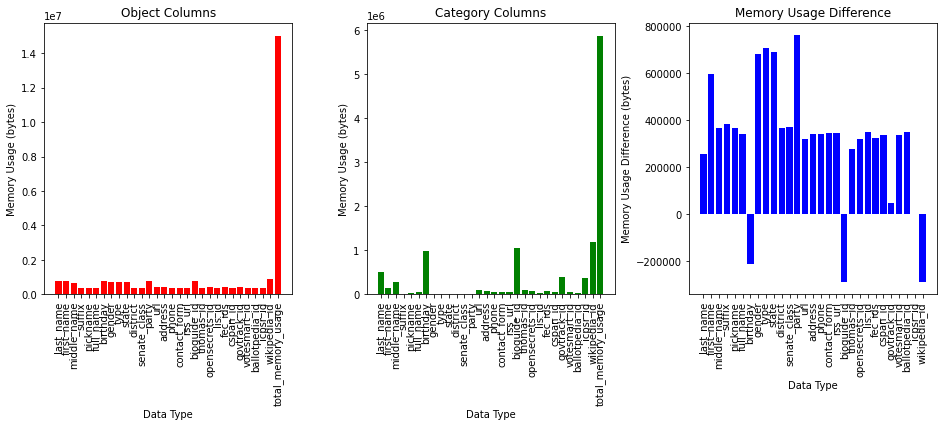

In [66]:
from US_Congress import check_memory_usage

# Get memory usage for object columns
memory_dict = check_memory_usage(df, col_type='object')

# Get memory usage for category columns
cat_memory_dict = check_memory_usage(df, col_type='category')

# Get memory usage difference
diff_dict = memory_usage_difference(df)

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# adjsut the padding between subplots
plt.subplots_adjust(wspace=0.3)

# Plot object memory usage
x_ticks = np.arange(len(memory_dict))
axes[0].bar(x_ticks, memory_dict.values(), color='r')
axes[0].set_xticks(x_ticks)
axes[0].set_xticklabels(memory_dict.keys(), rotation=90)
axes[0].set_xlabel('Data Type')
axes[0].set_ylabel('Memory Usage (bytes)')
axes[0].set_title('Object Columns')

# Plot category memory usage
axes[1].bar(x_ticks, cat_memory_dict.values(), color='g')
axes[1].set_xticks(x_ticks)
axes[1].set_xticklabels(cat_memory_dict.keys(), rotation=90)
axes[1].set_xlabel('Data Type')
axes[1].set_ylabel('Memory Usage (bytes)')
axes[1].set_title('Category Columns')

# Plot memory usage difference
diff = [diff_dict['column_diff'][col]['diff_bytes'] for col in df.columns]
x_ticks = np.arange(len(diff))
axes[2].bar(x_ticks, diff, color='b')
axes[2].set_xticks(x_ticks)
axes[2].set_xticklabels(df.columns, rotation=90)
axes[2].set_xlabel('Data Type')
axes[2].set_ylabel('Memory Usage Difference (bytes)')
axes[2].set_title('Memory Usage Difference')

plt.show()

[BACK TO TOP][def]

[def]: #-explore-pandas-groupby-and-memory-optimization-using-us-congress-dataset

### 3.Create a new df and run dtype transformation.

In [ ]:
# define dtypes, use categorical dtype
dtypes = {
    "first_name": "category",
    "last_name": "category",
    "gender": "category",
    "type": "category",
    "state": "category",
    "party": "category",
}

df = pd.read_csv(
    "../data/external/legislators-historical.csv",
    dtype= dtypes,
    usecols=list(dtypes) + ['birthday'], # add birthday column
    parse_dates=['birthday']
)

# check the last 10 records
df.tail(10)

[BACK TO TOP][def]

[def]: #-explore-pandas-groupby-and-memory-optimization-using-us-congress-dataset

### 4.Display the count of Congressional members on a state-by-state basis.

In [58]:
df.groupby('state') \
    .last_name \
    .count()

state
AK      16
AL     206
AR     117
AS       2
AZ      48
CA     361
CO      90
CT     240
DC       2
DE      97
DK       9
FL     155
GA     309
GU       4
HI      23
IA     202
ID      59
IL     486
IN     341
KS     141
KY     373
LA     197
MA     426
MD     305
ME     175
MI     294
MN     160
MO     333
MS     155
MT      52
NC     354
ND      44
NE     127
NH     181
NJ     359
NM      54
NV      56
NY    1461
OH     674
OK      92
OL       2
OR      89
PA    1053
PI      13
PR      19
RI     107
SC     251
SD      51
TN     299
TX     256
UT      53
VA     432
VI       4
VT     115
WA      95
WI     196
WV     120
WY      40
Name: last_name, dtype: int64